In [71]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
%matplotlib inline

#exploratory data analysis

In [72]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")


train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


#Data Quality & Missing Value Assessment

In [73]:
#check the number of missing values in each column
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

<AxesSubplot:>

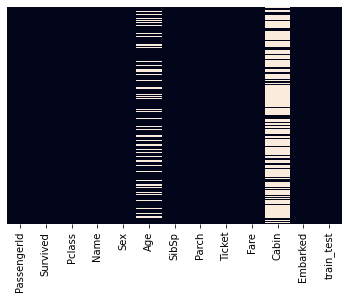

In [74]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

In [75]:
#Handling the missing values

#check the percentage of missing data for Age and Cabin
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))


Percent of missing "Age" records is 19.87%
Percent of missing "Cabin" records is 77.10%
Percent of missing "Embarked" records is 0.22%


In [76]:
#drop the cabin data column from data frame
train_df["Cabin"].drop(columns='Cabin', axis=1)

#replace the missing value in "Age" column with mean value
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

#replace the missing value in "Age" column with mode value (if needed or we can just leave it like that for the missing value)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [77]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [78]:
#quick way to separate numeric columns
train_df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [79]:
train_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


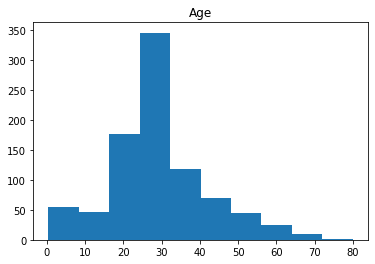

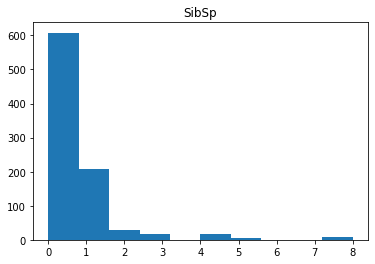

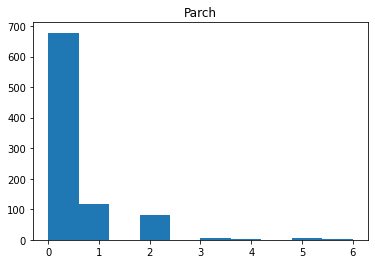

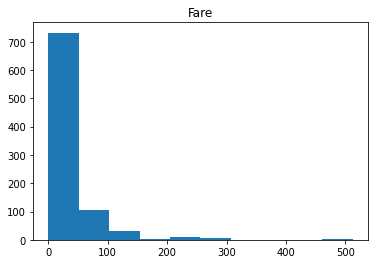

In [80]:
# look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

for Age seem like follow normal distribution but for SibSp, Parch and fare seem not follow normal distribution.
therefore consider to normalize them

            Age     SibSp     Parch      Fare
Age    1.000000 -0.232625 -0.179191  0.091566
SibSp -0.232625  1.000000  0.414838  0.159651
Parch -0.179191  0.414838  1.000000  0.216225
Fare   0.091566  0.159651  0.216225  1.000000


<AxesSubplot:>

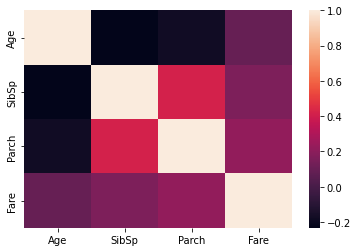

In [81]:
# check the coleration relationship data for age, sibsp, parch and fare use heatmap to understand more the survival rate
print(df_num.corr())
sns.heatmap(df_num.corr())

In [82]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


from above result the 0.0 are for people that not survived and the 1 for survived.
from heatmap we can see that family and young age tend to have bigger change to survived 
it also can see from our pivot table that showed if we pay more fare and younger age we can have higher change survival.
however for family that have sibling the rate lower than only family and the children itself.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

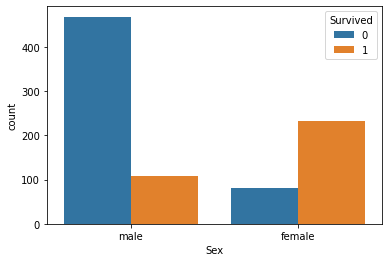

In [83]:
#find the survived based on sex
sns.countplot('Sex', hue='Survived', data=train_df)

from above showed that female more survived

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

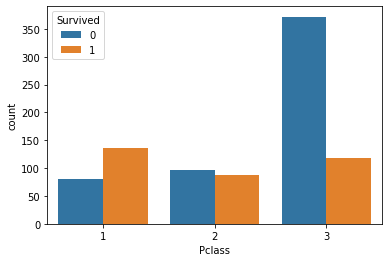

In [84]:
#find the survived based on Pclass
sns.countplot('Pclass', hue='Survived', data=train_df)

from above showed that first class more survived

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

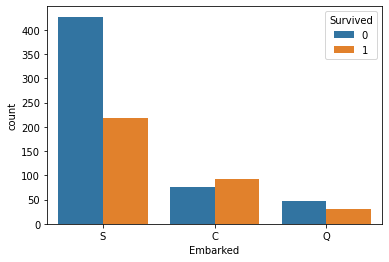

In [85]:
#find the survived based on Embarked
sns.countplot('Embarked', hue='Survived', data=train_df)

from aboves showed that more survived from embarked Southampton(S)

In [86]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


from above we can see that the survived from first class are 136 person, and the femaled that survived are 233 and male 109, and the most people survived embarked from S are 219.

## Feature Engineering 
### 1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

### 2) Tickets - Do different ticket types impact survival rates?

### 3) Does a person's title relate to survival rates? 

In [87]:
#separate data cabin into individual cabins from some of data of multiple cabins
df_cat.Cabin
train_df['cabin_multiple'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
train_df['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

from above we can see that most majority only have single cabins (0 = 687) and only 2 person that has multiple cabins.

In [88]:
#we need to see the survival rate base on cabin
pd.pivot_table(train_df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [89]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

train_df['cabin_adv'] = train_df.Cabin.apply(lambda x: str(x)[0])

#comparing surivial rate by cabin
print(train_df.cabin_adv.value_counts())
pd.pivot_table(train_df,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


from above most cabin that null(or no variable/no value) are most of not survived than survived.

In [90]:
#understand ticket values better 
#numeric vs non numeric 
train_df['numeric_ticket'] = train_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_df['ticket_letters'] = train_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

#
train_df['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [91]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
#pd.set_option('max_rows', None)
train_df['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [92]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(train_df,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [93]:
#survival rate across different tyicket types 
pd.pivot_table(train_df,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [94]:
#feature engineering on person's title 
train_df.Name.head(50)
train_df['name_title'] = train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc
#create list of name title to see most of people survived
train_df['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

## Data Preprocessing for Model 
### 1) Drop null values from Embarked (only 2) 

### 2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with) 
Variables:  'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

### 3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder). 

### 4) Impute data with mean for fare and age (Should also experiment with median) 

### 5) Normalized fare using logarithm to give more semblance of a normal distribution 

### 6) Scaled data 0-1 with standard scaler 

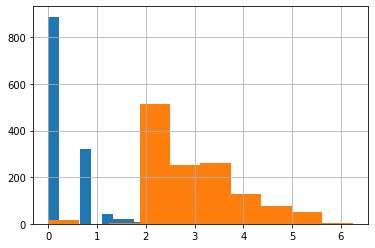

In [95]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(train_df.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(train_df.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)



In [96]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])



#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [97]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_train_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.607808,0.480272,-0.445407,-0.896331,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.636788,0.480272,-0.445407,1.347870,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.296659,-0.479537,-0.445407,-0.815013,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.403426,0.480272,-0.445407,1.048255,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.403426,-0.479537,-0.445407,-0.800632,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.218872,-0.479537,-0.445407,-0.349500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,-0.841169,-0.479537,-0.445407,0.472468,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,-0.008915,0.480272,1.864701,0.227038,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,-0.296659,-0.479537,-0.445407,0.472468,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [98]:
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)
X_test_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0.364532,-0.479537,-0.445407,-0.826172,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.336872,0.480272,-0.445407,-0.928150,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,2.503681,-0.479537,-0.445407,-0.628665,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.218872,-0.479537,-0.445407,-0.732917,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.607808,0.480272,0.709647,-0.403510,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.008915,-0.479537,-0.445407,-0.800632,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
414,0.714575,-0.479537,-0.445407,1.781098,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415,0.675681,-0.479537,-0.445407,-0.896331,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
416,-0.008915,-0.479537,-0.445407,-0.800632,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [99]:
y_train = all_data[all_data.train_test==1].Survived
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64

In [101]:
y_test = all_data[all_data.train_test==0].Survived
y_test

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [102]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
y_test = all_data[all_data.train_test==0].Survived # cant be use because most of the data are NaN

In [110]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
#Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362
[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [115]:
#we round up the value
NB_value = '%.3f' %(0.7221735542436362 * 100) 
print(NB_value)
LR_value = '%.3f' %(0.8211832666793626 * 100) 
print(LR_value)

72.217
82.118


the result using naive bayes are 72.21% and for logistic regression are 82.118%



In [107]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [108]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8268075922046594
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
